In [1]:
%%capture 
!pip install h2o==3.38.0.4
!pip install teemi

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# 11_2_LEARN-DataAnalysisML

<a target="_blank" href="https://colab.research.google.com/github/hiyama341/ConStrain/blob/main/colab_notebooks/11_2_LEARN_DataAnalysisML.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

We can import the data repository like this: 

In [3]:
# cloning the data repo
!git clone https://github.com/hiyama341/G8H_CPR_library.git

fatal: destination path 'G8H_CPR_library' already exists and is not an empty directory.


## 0. Intro

This is the second notebook showcasing how we can use machine learning techniques to predict the best promoter-gene combinations. We will use various machine learning algorithms through the package H2O. We continue the workflow by using Machine Learning to predict the best promoter:gene combinations of the remaining library that was generated in [09_2_BUILD_CombinatorialLibrary](../colab_notebooks/09_2_BUILD_CombinatorialLibrary.ipynb) and analyzed in [10_2_TEST_Library_Characterization](../colab_notebooks/07_1_LEARN_DataAnalysis.ipynb). 

What is different in this notebook is that we investigate how the ML faired in predicting strictosidine values and we compare how a ML model trained on two rounds of data differ from the one we used in notebook [07_1_LEARN_DataAnalysis](../colab_notebooks/07_1_LEARN_DataAnalysis.ipynb)


## Project overview - Use ML to predicte best promoter:gene combinations 

**Hypothesis**
1. Specific combinations of CPR / G8H homologs and corresponding expression levels can remove the G8H bottleneck in the Strictosidine pathway

Aim: To test the hypothesis

**2nd library**

Tasks
1. dgRNA
2. Base strain
3. Library
4. Phenotyping
**5. Machine Learning**
   - Predict the best promoter:gene combinations


## 1. Setup H2O AutoML

In [4]:
%%capture 
!pip install h2o

In [5]:
import h2o
from h2o.automl import H2OAutoML

In [6]:
# If this doesnt work - install java. 
# Start the H2O cluster (locally)
h2o.init(ip="localhost", min_mem_size_GB=8)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_361"; Java(TM) SE Runtime Environment (build 1.8.0_361-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from /Users/lucaslevassor/opt/anaconda3/envs/constrain/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmpjlbj9_4p
  JVM stdout: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmpjlbj9_4p/h2o_lucaslevassor_started_from_python.out
  JVM stderr: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmpjlbj9_4p/h2o_lucaslevassor_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,15 secs
H2O_cluster_timezone:,Europe/Copenhagen
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_lucaslevassor_emvhjh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.576 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


### 1.1 Import our dataframe as h20 object

Train a model based on the target and the df

In [7]:
first_input_for_ml = pd.read_csv('G8H_CPR_library/data/09-AutoML/input_to_ml/first_round/input_for_ml_1st_iteration_all_analytics.csv')
first_input_for_ml 

,Line_name,0,1,2,3,Amt_uM_Strictosidine,Amt_norm
0,yp49_A01,1,2,5,1,0.271199,0.922793
1,yp49_C01,1,2,5,9,0.149626,0.509123
2,yp49_D01,2,4,7,3,0.049042,0.166871
3,yp49_E01,2,1,5,7,0.096246,0.327489
4,yp49_F01,3,3,6,1,7.365141,25.060934
...,...,...,...,...,...,...,...
162,yp51_C12,8,3,7,2,0.000000,0.000000
163,yp51_D12,8,2,7,6,0.202343,0.591185
164,yp51_E12,8,1,6,10,0.153556,0.448644
165,yp50_F05,6,1,8,2,4.656777,13.391244


### 1.2 Investigate how the predictions from the previous ML cycle matched the sampled strains 

In [8]:
# Run ML with new input 
second_input_for_ml = pd.read_csv('G8H_CPR_library/data/09-AutoML/input_to_ml/second_round/input_for_ml_2nd_iteration_all_analytics.csv')
second_input_for_ml

,Line_name,0,1,2,3,Amt_uM_Strictosidine,Amt_norm
0,yp53_A01,4,1,5,2,2.546823,9.058562
1,yp53_A02,4,1,5,2,7.921696,28.175952
2,yp53_A04,4,2,5,2,22.597750,80.375862
3,yp53_A06,5,1,5,2,34.235068,121.767572
4,yp53_A07,5,2,6,2,44.719792,159.059724
...,...,...,...,...,...,...,...
124,yp54_A04,4,1,6,1,4.326963,15.322951
125,yp54_C04,5,2,6,3,26.634041,94.318358
126,yp54_C09,3,1,6,3,13.122270,46.469517
127,yp54_D12,5,1,6,6,1.049920,3.718051


In [9]:
list_of_promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

promoter_dict = {i+1:list_of_promoters[i]for i in range(len(list_of_promoters))}


g8h_list_of_index = ["Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"]
cpr_list_of_index = ["Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"]

pg8h_list_of_index = ['CYC1', 'ENO2']
pcpr_list_of_index = ['CCW12', 'TPI1'] 


g8h_genotype = []
cpr_genotype = []
pg8h_genotype = []
pcpr_genotype = []

# adding index of genotypes to individual rows 
for index, row in second_input_for_ml.iterrows():
    # homologs
    g8h_name = g8h_list_of_index[int(row['0']-1)]
    cpr_name = cpr_list_of_index[int(row['3']-1)]
    
    # promoters
    pg8h_name =promoter_dict[row['1']]
    pcpr_name = promoter_dict[row['2']]
    
    
    # save the genotypes
    g8h_genotype.append(g8h_name)
    cpr_genotype.append(cpr_name)
    pg8h_genotype.append(pg8h_name)
    pcpr_genotype.append(pcpr_name)

second_input_for_ml['G8H'] = g8h_genotype
second_input_for_ml['pG8H'] = pg8h_genotype
second_input_for_ml['pCPR'] = pcpr_genotype
second_input_for_ml['CPR'] = cpr_genotype
second_input_for_ml

,Line_name,0,1,2,3,Amt_uM_Strictosidine,Amt_norm,G8H,pG8H,pCPR,CPR
0,yp53_A01,4,1,5,2,2.546823,9.058562,Vmin,CYC1,CCW12,Aan
1,yp53_A02,4,1,5,2,7.921696,28.175952,Vmin,CYC1,CCW12,Aan
2,yp53_A04,4,2,5,2,22.597750,80.375862,Vmin,ENO2,CCW12,Aan
3,yp53_A06,5,1,5,2,34.235068,121.767572,Smus,CYC1,CCW12,Aan
4,yp53_A07,5,2,6,2,44.719792,159.059724,Smus,ENO2,TPI1,Aan
...,...,...,...,...,...,...,...,...,...,...,...
124,yp54_A04,4,1,6,1,4.326963,15.322951,Vmin,CYC1,TPI1,Cro
125,yp54_C04,5,2,6,3,26.634041,94.318358,Smus,ENO2,TPI1,Ara
126,yp54_C09,3,1,6,3,13.122270,46.469517,Cro,CYC1,TPI1,Ara
127,yp54_D12,5,1,6,6,1.049920,3.718051,Smus,CYC1,TPI1,Ahu


In [10]:
second_input_for_ml["Names"] = second_input_for_ml[['G8H', 'pG8H','pCPR', 'CPR']].agg('-'.join, axis=1)
second_input_for_ml =second_input_for_ml[['Names', 'Amt_norm', 'Line_name']]
second_input_for_ml

,Names,Amt_norm,Line_name
0,Vmin-CYC1-CCW12-Aan,9.058562,yp53_A01
1,Vmin-CYC1-CCW12-Aan,28.175952,yp53_A02
2,Vmin-ENO2-CCW12-Aan,80.375862,yp53_A04
3,Smus-CYC1-CCW12-Aan,121.767572,yp53_A06
4,Smus-ENO2-TPI1-Aan,159.059724,yp53_A07
...,...,...,...
124,Vmin-CYC1-TPI1-Cro,15.322951,yp54_A04
125,Smus-ENO2-TPI1-Ara,94.318358,yp54_C04
126,Cro-CYC1-TPI1-Ara,46.469517,yp54_C09
127,Smus-CYC1-TPI1-Ahu,3.718051,yp54_D12


In [11]:
first_round_top_producers = pd.read_csv('G8H_CPR_library/data/09-AutoML/Top20_predictions/first_round/top20_ML_predicted_after_first_DBTL_1st_analytics.csv')
first_round_top_producers = first_round_top_producers.sort_values(by='Predicted_strict_production', ascending=False)

# add names columns
first_round_top_producers["Names"] = first_round_top_producers[['G8H', 'pG8H','pCPR', 'CPR']].agg('-'.join, axis=1)
first_round_top_producers  = first_round_top_producers[['Names', 'Predicted_strict_production']]
first_round_top_producers['Predicted_strict_production_rank_pct']= first_round_top_producers['Predicted_strict_production'].rank(pct=True)
first_round_top_producers

,Names,Predicted_strict_production,Predicted_strict_production_rank_pct
0,Smus-ENO2-TPI1-Rse,169.288180,1.000000
1,Rsep-ENO2-TPI1-Ara,162.151856,0.999106
2,Smus-ENO2-CCW12-Ara,161.904255,0.998213
3,Smus-CYC1-TPI1-Ara,157.638727,0.997319
4,Smus-ENO2-TPI1-Aan,156.976470,0.996425
...,...,...,...
1114,Rsep-CYC1-TPI1-Ani,-9.125477,0.004468
1115,Ccal-ENO2-TPI1-Cac,-12.768510,0.003575
1116,Rsep-PCK1-CCW12-Ara,-12.901417,0.002681
1117,Ccal-ENO2-CCW12-Cac,-16.241411,0.001787


In [12]:
second_input_for_ml

,Names,Amt_norm,Line_name
0,Vmin-CYC1-CCW12-Aan,9.058562,yp53_A01
1,Vmin-CYC1-CCW12-Aan,28.175952,yp53_A02
2,Vmin-ENO2-CCW12-Aan,80.375862,yp53_A04
3,Smus-CYC1-CCW12-Aan,121.767572,yp53_A06
4,Smus-ENO2-TPI1-Aan,159.059724,yp53_A07
...,...,...,...
124,Vmin-CYC1-TPI1-Cro,15.322951,yp54_A04
125,Smus-ENO2-TPI1-Ara,94.318358,yp54_C04
126,Cro-CYC1-TPI1-Ara,46.469517,yp54_C09
127,Smus-CYC1-TPI1-Ahu,3.718051,yp54_D12


In [13]:
## merging the unsampled library with the second sampling
predicted_vs_sampled = pd.merge(first_round_top_producers, second_input_for_ml, on=['Names'])
predicted_vs_sampled['norm_strict_measured_rank'] = predicted_vs_sampled['Amt_norm'].rank(pct=True)
predicted_vs_sampled['Predicted_strict_production_rank_pct'] = predicted_vs_sampled['Predicted_strict_production'].rank(pct=True)

predicted_vs_sampled = predicted_vs_sampled.sort_values(by= 'Amt_norm', ascending = False)

In [14]:
predicted_vs_sampled

,Names,Predicted_strict_production,Predicted_strict_production_rank_pct,Amt_norm,Line_name,norm_strict_measured_rank
0,Smus-ENO2-TPI1-Rse,169.288180,0.995575,169.631396,yp53_D09,1.000000
10,Rsep-ENO2-TPI1-Clo,103.496648,0.907080,159.517718,yp53_C06,0.991150
4,Smus-ENO2-TPI1-Aan,156.976470,0.964602,159.059724,yp53_A07,0.982301
31,Smus-CYC1-CCW12-Clo,57.162466,0.725664,143.483630,yp53_C01,0.973451
32,Cro-ENO2-TPI1-Cro,56.438602,0.712389,138.267757,yp54_B01,0.964602
...,...,...,...,...,...,...
99,Smus-CYC1-TPI1-Ahu,2.649671,0.123894,0.000000,yp54_D10,0.061947
98,Smus-CYC1-TPI1-Ahu,2.649671,0.123894,0.000000,yp54_D09,0.061947
97,Cro-CYC1-CCW12-Ani,2.686140,0.146018,0.000000,yp53_G04,0.061947
96,Cro-CYC1-CCW12-Ani,2.686140,0.146018,0.000000,yp53_G03,0.061947


In [15]:
from teemi.learn.plotting import correlation_plot

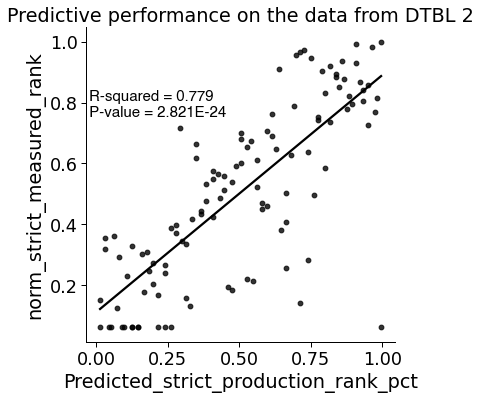

In [16]:
correlation_plot(predicted_vs_sampled,"Predicted_strict_production_rank_pct","norm_strict_measured_rank",
                 title = 'Predictive performance on the data from DTBL 2',
                 size_height= 5, size_length = 5)

### 1.3 Concatting the dataframes for updating the model 

In [17]:
first_input_for_ml = pd.read_csv('G8H_CPR_library/data/09-AutoML/input_to_ml/first_round/input_for_ml_1st_iteration_all_analytics.csv')
second_input_for_ml = pd.read_csv('G8H_CPR_library/data/09-AutoML/input_to_ml/second_round/input_for_ml_2nd_iteration_all_analytics.csv')

We can add the first dataframe to the second. See below: 

In [18]:
new_input_for_ml = pd.concat([first_input_for_ml, second_input_for_ml])
new_input_for_ml

,Line_name,0,1,2,3,Amt_uM_Strictosidine,Amt_norm
0,yp49_A01,1,2,5,1,0.271199,0.922793
1,yp49_C01,1,2,5,9,0.149626,0.509123
2,yp49_D01,2,4,7,3,0.049042,0.166871
3,yp49_E01,2,1,5,7,0.096246,0.327489
4,yp49_F01,3,3,6,1,7.365141,25.060934
...,...,...,...,...,...,...,...
124,yp54_A04,4,1,6,1,4.326963,15.322951
125,yp54_C04,5,2,6,3,26.634041,94.318358
126,yp54_C09,3,1,6,3,13.122270,46.469517
127,yp54_D12,5,1,6,6,1.049920,3.718051


### 1.4 Update dataframe Change 

In [19]:
df_test = h2o.H2OFrame(pd.concat([new_input_for_ml], axis='columns'))
df_test.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:296
Cols:7

,Line_name,0,1,2,3,Amt_uM_Strictosidine,Amt_norm
type,string,int,int,int,int,real,real
mins,NaN,1.0,1.0,5.0,1.0,0.0,0.0
mean,NaN,4.773648648648647,2.1452702702702697,6.135135135135138,4.750000000000003,8.425198588094599,28.172298324091862
maxs,NaN,8.0,4.0,8.0,10.0,85.21014946,245.03427469317091
sigma,NaN,1.946604570553522,1.115003045338059,1.0554051268004114,2.5930153901508803,13.47666920488858,44.45848009052247
zeros,0,0,0,0,0,72,72
missing,0,0,0,0,0,0,0
0,yp49_A01,1.0,2.0,5.0,1.0,0.271198899,0.9227925961906795
1,yp49_C01,1.0,2.0,5.0,9.0,0.149625874,0.5091231905250453
2,yp49_D01,2.0,4.0,7.0,3.0,0.049041597,0.166870967337397


In [20]:
# Since the data is categorical we need to make it from numerical to categorical 
df_test['0']= df_test['0'].asfactor()
df_test['1']= df_test['1'].asfactor()
df_test['2'] = df_test['2'].asfactor()
df_test['3'] = df_test['3'].asfactor()

In [21]:
df_test.describe()

Rows:296
Cols:7

,Line_name,0,1,2,3,Amt_uM_Strictosidine,Amt_norm
type,string,enum,enum,enum,enum,real,real
mins,NaN,,,,,0.0,0.0
mean,NaN,,,,,8.425198588094599,28.172298324091862
maxs,NaN,,,,,85.21014946,245.03427469317091
sigma,NaN,,,,,13.47666920488858,44.45848009052247
zeros,0,,,,,72,72
missing,0,0,0,0,0,0,0
0,yp49_A01,1,2,5,1,0.271198899,0.9227925961906795
1,yp49_C01,1,2,5,9,0.149625874,0.5091231905250453
2,yp49_D01,2,4,7,3,0.049041597,0.166870967337397


### 1.5 If you dont want to run the AutoML skip the following paragraphs and go to paragraph 4.

## 2. RUN automl

Set some arguments for the autoML. 


Important here is that we dont split the dataset but rather keep the cross-validation validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split. See: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html


Here we are defining the autoML object and after we can train it

In [22]:
# Select the columns we want to train on
feature_cols = ['0', '1', '2', '3']

# Initialize H2O autoML class
AutoML = H2OAutoML(
    max_runtime_secs=0,  # 1 hour =int(3600 * 1) , if unlimited time is wanted then set this to zero = 0
    max_models=None,  # None =  no limit
    nfolds=10,         # number of folds for k-fold cross-validation (nfolds=0 disables cross-validation)
    seed=1,            # Reproducibility
    sort_metric = "MAE",
    #exclude_algos = ["StackedEnsemble"], # Stacked ensemble cannot perform CV-holdout_predictions
    keep_cross_validation_predictions=True,
    #keep_cross_validation_models = True,
    #keep_cross_validation_fold_assignment = True, 
)

Train a model based on the target and the df. 

In [23]:
#%%time
#
#AutoML.train(
#     x=feature_cols,
#     y='Amt_norm',
#     training_frame=df_test,
# )

In [24]:
#print('DOOOOOOONE')

## 3. Processing model . i.e. saving the best model and the leaderboard. 


In [25]:
### Saving the leaderboard ids
#leaderboard = AutoML.leaderboard
#model_ids = list(leaderboard['model_id'].as_data_frame().iloc[:,0])
#

In [26]:
## how to save any model
#out_path = 'G8H_CPR_library/data/09-AutoML/best_models/second_round/'
#mdl = h2o.get_model(model_ids[1])
#h2o.save_model(model=mdl, path=out_path, force=True)
#

Now we want to extract the best models

In [27]:
#df_from_h2o_object = leaderboard.as_data_frame(use_pandas=True, header=True)
#df_from_h2o_object

### 3.1 Saving the best model

In [28]:
#best_model = AutoML.get_best_model()
#best_model

In [29]:
#model_path = h2o.save_model(model=best_model, path="G8H_CPR_library/data/09-AutoML/best_models/second_round/", force=True)

### 3.2 Exporting the leaderboard

In [30]:
## saving the leaderboard
#out_path = 'G8H_CPR_library/data/09-AutoML/leaderboards/second_round/'
#h2o.export_file(leaderboard, os.path.join(out_path, 'aml_leaderboard.h2o'), force=True)

### 3.3 saving the CV-holdout predictions 


In [31]:
## Get the predictions
#cross_validation_holdout_predictions = best_model.cross_validation_holdout_predictions()
#
## make the df_test to a dataframe
#as_data_frame_df_test = df_test.as_data_frame()
#
## Make cv_pred to a dataframe
#as_data_frame_CV_predictions = cross_validation_holdout_predictions.as_data_frame()
#as_data_frame_CV_predictions.columns = ['cv_holdout_predictions']
#as_data_frame_CV_predictions

In [32]:
## merge with the test dataframe
#df3 = pd.merge(as_data_frame_df_test, as_data_frame_CV_predictions, left_index=True, right_index=True)
#df3 = df3.sort_values(by= 'Amt_norm', ascending= False)
#df3 = df3.reset_index()
#df3['ranked_pct'] = df3['Amt_norm'].rank(pct= True)
#df3['cv_holdout_predictions_ranked_pct'] = df3['cv_holdout_predictions'].rank(pct= True)
#df3

In [33]:
## save it to the folder
#df3.to_csv('G8H_CPR_library/data/09-AutoML/cv_holdout_predictions/second_round/cv_holdout_predictions.csv')

## 4. Importing the best model 

If you didnt have time to run the model you can start from here and import it. 

Start by importing the leaderboard

In [34]:
leaderboard_path = 'G8H_CPR_library/data/09-AutoML/leaderboards/second_round/'
lb = h2o.import_file(path=os.path.join(leaderboard_path, "aml_leaderboard.h2o"))
lb

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,mae,rmse,mse,rmsle,mean_residual_deviance
XGBoost_lr_search_selection_AutoML_2_20230201_153113_select_grid_model_3,11.9288,23.3401,544.76,nan,544.76
StackedEnsemble_BestOfFamily_7_AutoML_2_20230201_153113,12.0041,23.2071,538.568,nan,538.568
StackedEnsemble_BestOfFamily_5_AutoML_2_20230201_153113,12.0682,23.1038,533.783,nan,533.783
XGBoost_grid_1_AutoML_2_20230201_153113_model_165,12.2021,23.8091,566.874,nan,566.874
StackedEnsemble_BestOfFamily_4_AutoML_2_20230201_153113,12.311,24.0141,576.676,nan,576.676
StackedEnsemble_AllModels_5_AutoML_2_20230201_153113,12.4988,23.2079,538.608,nan,538.608
XGBoost_grid_1_AutoML_2_20230201_153113_model_131,12.5229,23.5701,555.55,nan,555.55
StackedEnsemble_AllModels_6_AutoML_2_20230201_153113,12.6098,23.4335,549.13,nan,549.13
StackedEnsemble_BestOfFamily_6_AutoML_2_20230201_153113,12.8598,24.1369,582.589,0.963671,582.589
StackedEnsemble_Best1000_1_AutoML_2_20230201_153113,13.3572,23.8771,570.116,nan,570.116


Then the best model. So the following is usefull if you want to try and use the other models(and you have saved them). Alternatively, you can also use the model we have saved and was trained in this work namely: 'XGBoost_lr_search_selection_AutoML_2_20230201_153113_select_grid_model_3'

In [35]:
best_model = h2o.load_model("G8H_CPR_library/data/09-AutoML/best_models/second_round/"+lb[0,0])
#my_local_model = h2o.download_model(best_model, path="G8H_CPR_library/data/09-AutoML/best_models/second_round/")
#uploaded_model = h2o.upload_model(my_local_model)

### 4.1 Investigate model

Get the cross validation predictions

In [36]:
# import the cross validated dataframe 
df3 = pd.read_csv('G8H_CPR_library/data/09-AutoML/cv_holdout_predictions/second_round/cv_holdout_predictions.csv')
df3

,Unnamed: 0,index,Line_name,0,1,2,3,Amt_uM_Strictosidine,Amt_norm,cv_holdout_predictions,ranked_pct,cv_holdout_predictions_ranked_pct
0,0,73,yp50_D03,5,2,6,3,85.210149,245,94.520157,1.000000,0.922297
1,1,205,yp53_D09,5,2,6,5,47.692027,169,99.468376,0.996622,0.942568
2,2,193,yp53_C06,6,2,6,4,44.848557,159,110.375237,0.991554,0.976351
3,3,171,yp53_A07,5,2,6,2,44.719792,159,114.916611,0.991554,0.986486
4,4,75,yp50_G03,6,2,6,5,54.362482,156,108.625351,0.986486,0.969595
...,...,...,...,...,...,...,...,...,...,...,...,...
291,291,105,yp50_F08,6,4,7,3,0.000000,0,-0.719766,0.195946,0.030405
292,292,108,yp50_A10,4,4,8,4,0.101052,0,0.582005,0.195946,0.317568
293,293,114,yp50_D11,5,4,8,6,0.000000,0,0.015273,0.195946,0.152027
294,294,117,yp50_B12,4,1,7,8,0.000000,0,-4.872061,0.195946,0.003378


### 4.2 Plotting the CV-holdout predictions agains the measured values per sample. 

In [37]:
from teemi.learn.plotting import bar_plot_w_hue

In [38]:
%%capture
# initialing the sampled strictosidine values 
ds1 = df3[['Line_name', 'Amt_norm']]
ds1.columns = ['Line_name', 'strict']

# intializing the holdout_predictions
ds2 = df3[['Line_name', 'cv_holdout_predictions']]
ds2.columns = ['Line_name', 'strict']

# add category
ds2['category'] = 'CV_holdout_predictions'
ds1['category'] = 'strictosidine'
dss = pd.concat([ds1, ds2])

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


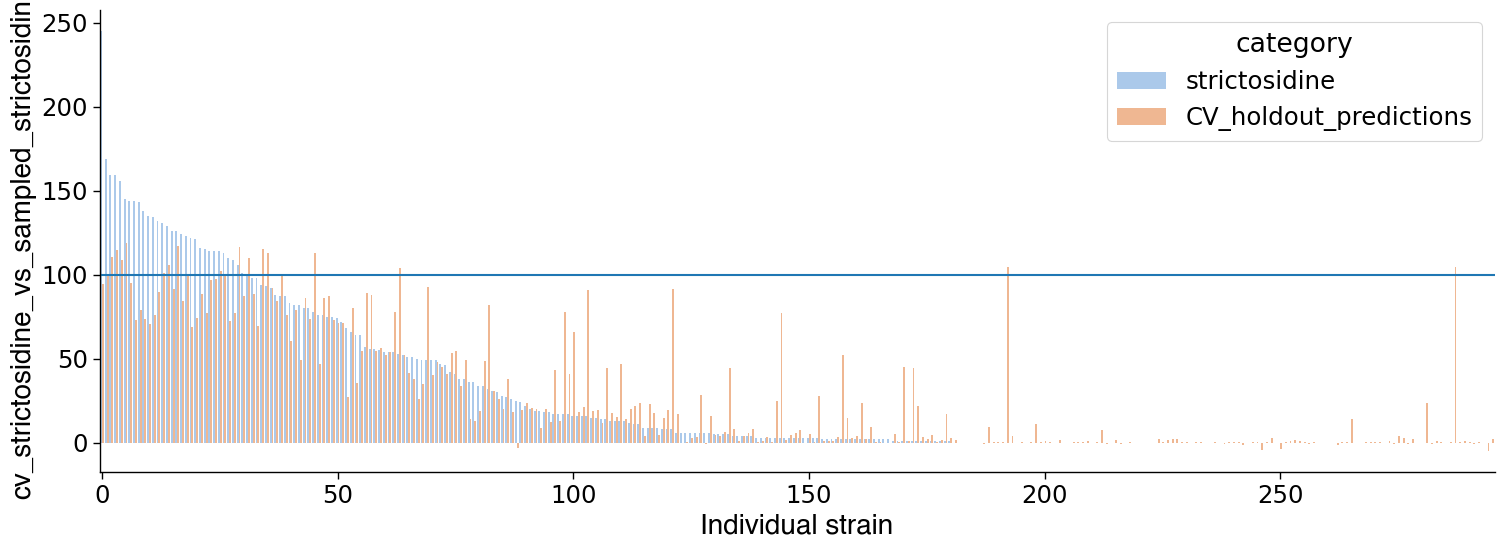

In [39]:
bar_plot_w_hue(dss, 'Line_name', 'strict', path = 'G8H_CPR_library/data/10-plots/11_2_LEARN_Data_analysis/Bar_plot_prediction_vs_the_sampled_library', #G8H_CPR_library/data/10-plots/11_2_LEARN_Data_analysis/Bar_plot_prediction_vs_the_sampled_library
              x_label = 'Individual strain',
               hue = 'category',
               palette = 'pastel',
               y_label= 'cv_strictosidine_vs_sampled_strictosidine', 
                size_height = 6,
                size_length = 18
              )

#### CV-Holdout predictions vs measured correlation plot

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


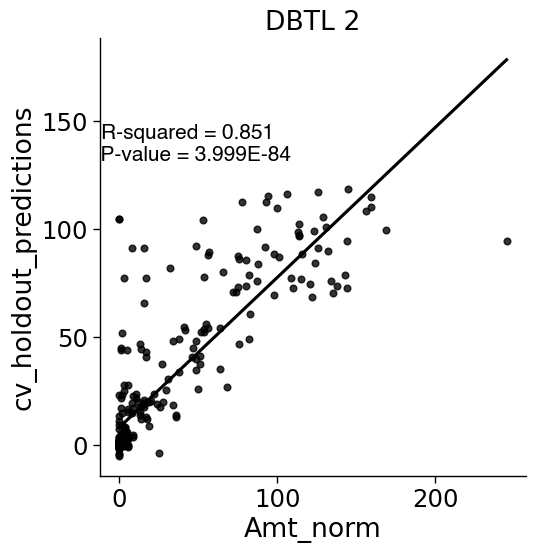

In [40]:
correlation_plot(df3,"Amt_norm","cv_holdout_predictions", 
                path = 'G8H_CPR_library/data/10-plots/11_2_LEARN_Data_analysis/corr_plot_normalized_val',
                 title= 'DBTL 2',
                size_height = 5, 
                size_length= 5)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


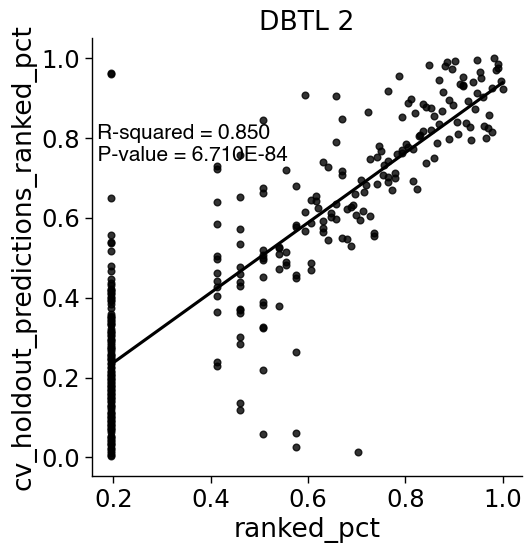

In [41]:
correlation_plot(df3,"ranked_pct","cv_holdout_predictions_ranked_pct",
                path = 'G8H_CPR_library/data/10-plots/11_2_LEARN_Data_analysis/corr_plot_ranked',
                title= 'DBTL 2',

                size_height = 5, 
                size_length= 5)

### 4.3 Find predicted genotypes

In [42]:
import numpy as np

In [43]:
all_genotypes = pd.read_csv('G8H_CPR_library/data/09-AutoML/genotypes_for_ml/remaining_genotypes_after_first_iteration.csv',)
all_genotypes =all_genotypes[['0','1','2','3']]
all_genotypes

,0,1,2,3
0,1,1,5,1
1,1,1,5,2
2,1,1,5,4
3,1,1,5,5
4,1,1,5,7
...,...,...,...,...
1117,8,4,8,6
1118,8,4,8,7
1119,8,4,8,8
1120,8,4,8,9


In [44]:
all_genotypes_df = h2o.H2OFrame(pd.concat([all_genotypes], axis='columns'))
all_genotypes_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0,1,2,3
1,1,5,1
1,1,5,2
1,1,5,4
1,1,5,5
1,1,5,7
1,1,5,8
1,1,5,9
1,1,6,1
1,1,6,2
1,1,6,3


In [45]:
input_fixed = new_input_for_ml[['0','1','2','3']]
input_fixed

,0,1,2,3
0,1,2,5,1
1,1,2,5,9
2,2,4,7,3
3,2,1,5,7
4,3,3,6,1
...,...,...,...,...
124,4,1,6,1
125,5,2,6,3
126,3,1,6,3
127,5,1,6,6


### 4.4 Getting rid of the genotypes we have already tested:

In [46]:
df_diff = all_genotypes[~all_genotypes.apply(tuple,1).isin(input_fixed.apply(tuple,1))]
df_diff.to_csv('G8H_CPR_library/data/09-AutoML/genotypes_for_ml/remaining_genotypes_after_second_iteration.csv')
df_diff

,0,1,2,3
0,1,1,5,1
1,1,1,5,2
2,1,1,5,4
3,1,1,5,5
4,1,1,5,7
...,...,...,...,...
1117,8,4,8,6
1118,8,4,8,7
1119,8,4,8,8
1120,8,4,8,9


In [47]:
# make the diff into a df 
all_genotypes_df = h2o.H2OFrame(pd.concat([df_diff], axis='columns'))
all_genotypes_df['0']= all_genotypes_df['0'].asfactor()
all_genotypes_df['1']= all_genotypes_df['1'].asfactor()
all_genotypes_df['2'] = all_genotypes_df['2'].asfactor()
all_genotypes_df['3'] = all_genotypes_df['3'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


### 4.5 Predict the phenotype from the genotype of the unseen library

In [48]:
predicted = best_model.predict(all_genotypes_df)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [49]:
len(predicted)

1046

In [50]:
predicted_norm = predicted.as_data_frame()
predicted_norm.head()

,predict
0,0.208979
1,0.282979
2,0.895885
3,0.767943
4,0.149506


In [51]:
# making predictions into a list
predicted_list = predicted_norm['predict'].values.tolist()

# Adding predictions to our dataframe
df_diff['predicted_norm_strict'] = predicted_list

# Sorting the dataframe
predicted_merged_sorted = df_diff.sort_values('predicted_norm_strict', ascending=False)
predicted_merged_sorted

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_2976/105107836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['predicted_norm_strict'] = predicted_list


,0,1,2,3,predicted_norm_strict
614,5,2,6,8,121.887856
610,5,2,6,4,120.655922
748,6,2,6,2,118.661545
752,6,2,6,8,116.150963
605,5,2,5,8,115.912682
...,...,...,...,...,...
862,7,1,7,1,-6.313099
864,7,1,7,3,-6.768794
865,7,1,7,4,-7.006977
866,7,1,7,5,-7.386846


If we want the names on the genotypes we can do the following: 

In [52]:
g8h_list_of_index = ["Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"]
cpr_list_of_index = ["Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"]
promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

g8h_genotype = []
cpr_genotype = []

pg8h_genotype = []
pcpr_genotype = []

predicted_list = []
# adding index of genotypes to individual rows 
for index, row in predicted_merged_sorted.iterrows():
    g8h_genotype.append(g8h_list_of_index[int(row['0'])-1])
    cpr_genotype.append(cpr_list_of_index[int(row['3'])-1])
    pg8h_genotype.append(promoters[int(row['1'])-1])
    pcpr_genotype.append(promoters[int(row['2'])-1])
    predicted_list.append(row['predicted_norm_strict'])
    
    
list_of_lists = [g8h_genotype,pg8h_genotype,pcpr_genotype, cpr_genotype, predicted_list  ]

## 5. Top 20 predicted producers

In [53]:
df_with_genotypes = pd.DataFrame(list_of_lists )
df_with_genotypes = df_with_genotypes.T
df_with_genotypes.columns = ['G8H', 'pG8H', 'pCPR', 'CPR', 'Predicted_strict_production']
df_with_genotypes.head(20)

,G8H,pG8H,pCPR,CPR,Predicted_strict_production
0,Smus,ENO2,TPI1,Cac,121.887856
1,Smus,ENO2,TPI1,Clo,120.655922
2,Rsep,ENO2,TPI1,Aan,118.661545
3,Rsep,ENO2,TPI1,Cac,116.150963
4,Smus,ENO2,CCW12,Cac,115.912682
5,Smus,ENO2,CCW12,Aan,115.522354
6,Smus,ENO2,CCW12,Clo,114.77845
7,Smus,ENO2,CCW12,Ara,110.120384
8,Rsep,ENO2,CCW12,Rse,109.848526
9,Rsep,ENO2,CCW12,Cac,108.326645


Saving the predictions

In [54]:
#Top20
df_with_genotypes_top20 = df_with_genotypes[:20]
df_with_genotypes_top20.to_csv('G8H_CPR_library/data/09-AutoML/Top20_predictions/second_round/top20_ML_predicted_after_second_DBTL_2nd_analytics_1.csv')

# All predictions
df_with_genotypes.to_csv('G8H_CPR_library/data/09-AutoML/all_predictions/second_round/top_ML_predicted_after_second_DBTL_2nd_analytics.csv', index=False)

In [55]:
from teemi.learn.plotting import bar_plot
bar_plot

<function teemi.learn.plotting.bar_plot(x: list, y: list, error_bar: list = None, horisontal_line=True, save_pdf=True, color='white', path='', title=None, x_label=None, y_label=None, size_height: int = 25, size_length: int = 15) -> None>

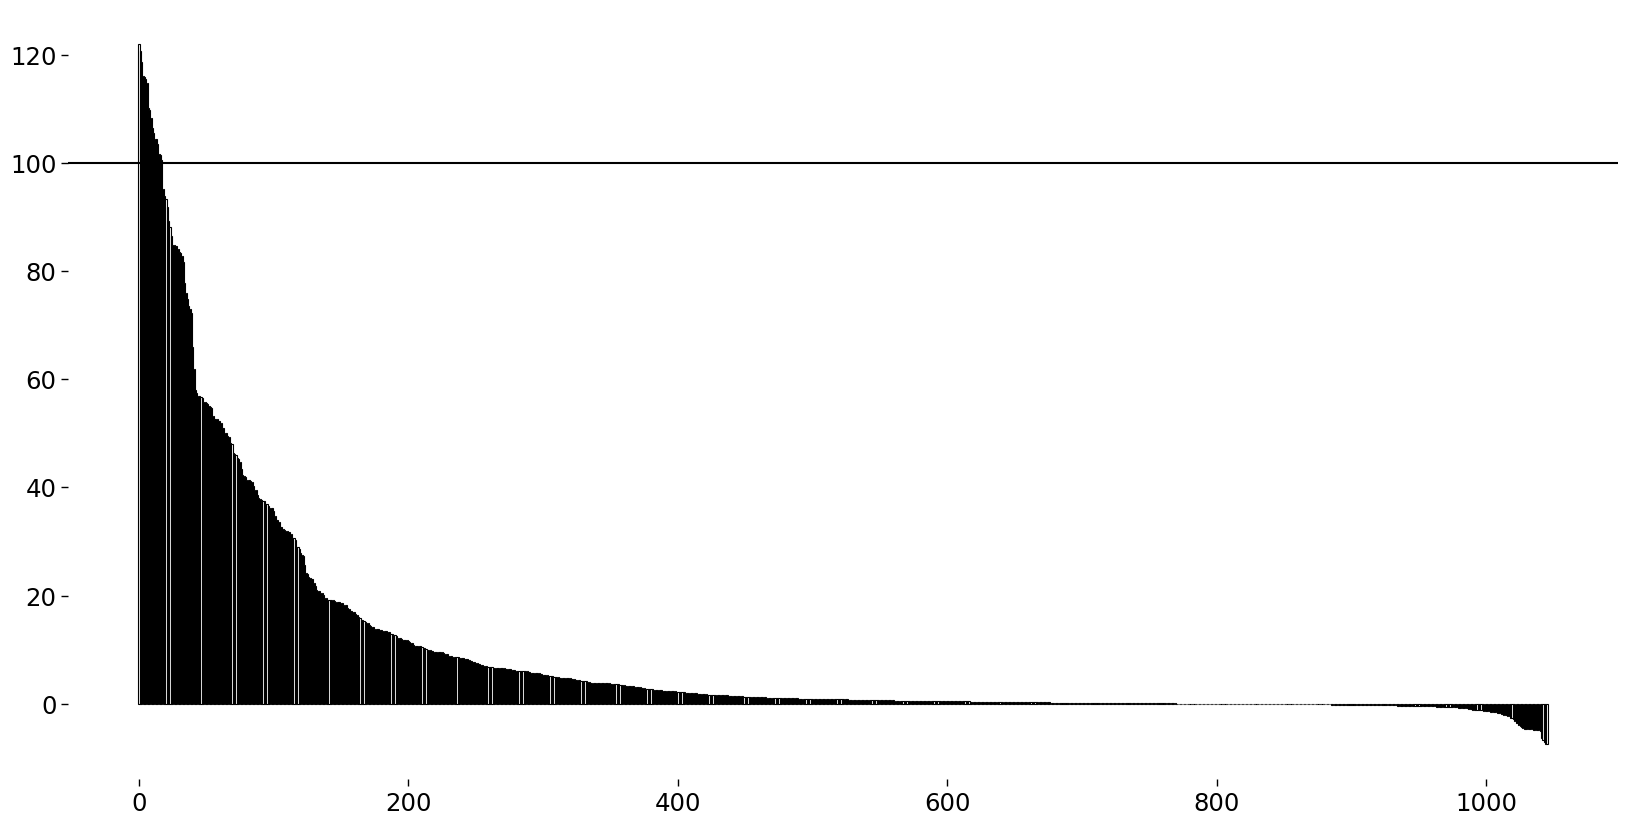

In [56]:
x = list(df_with_genotypes.index)
y = list(df_with_genotypes['Predicted_strict_production'])

bar_plot(x, y,
         path = 'G8H_CPR_library/data/10-plots/11_2_LEARN_Data_analysis/barplot_predicting_remaining_best_combinations',
         size_height =  10, 
         size_length = 20)

In [57]:
df_with_genotypes = pd.read_csv('G8H_CPR_library/data/09-AutoML/all_predictions/second_round/top_ML_predicted_after_second_DBTL_2nd_analytics.csv')

In [58]:
df_with_genotypes['names'] = df_with_genotypes['G8H']+'-' +df_with_genotypes['pG8H']+ '_'+ df_with_genotypes['pCPR']+'_'+df_with_genotypes['CPR']

In [59]:
df_with_genotypes

,G8H,pG8H,pCPR,CPR,Predicted_strict_production,names
0,Smus,ENO2,TPI1,Cac,121.887856,Smus-ENO2_TPI1_Cac
1,Smus,ENO2,TPI1,Clo,120.655922,Smus-ENO2_TPI1_Clo
2,Rsep,ENO2,TPI1,Aan,118.661545,Rsep-ENO2_TPI1_Aan
3,Rsep,ENO2,TPI1,Cac,116.150963,Rsep-ENO2_TPI1_Cac
4,Smus,ENO2,CCW12,Cac,115.912682,Smus-ENO2_CCW12_Cac
...,...,...,...,...,...,...
1041,Oeu,CYC1,MLS1,Cro,-6.313099,Oeu-CYC1_MLS1_Cro
1042,Oeu,CYC1,MLS1,Ara,-6.768794,Oeu-CYC1_MLS1_Ara
1043,Oeu,CYC1,MLS1,Clo,-7.006977,Oeu-CYC1_MLS1_Clo
1044,Oeu,CYC1,MLS1,Rse,-7.386846,Oeu-CYC1_MLS1_Rse


In [60]:
x_axis = list(df_with_genotypes['names'])[:20][::-1]
y_axis = list(df_with_genotypes['Predicted_strict_production'])[:20][::-1]

In [61]:
from teemi.learn.plotting import horisontal_bar_plot

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


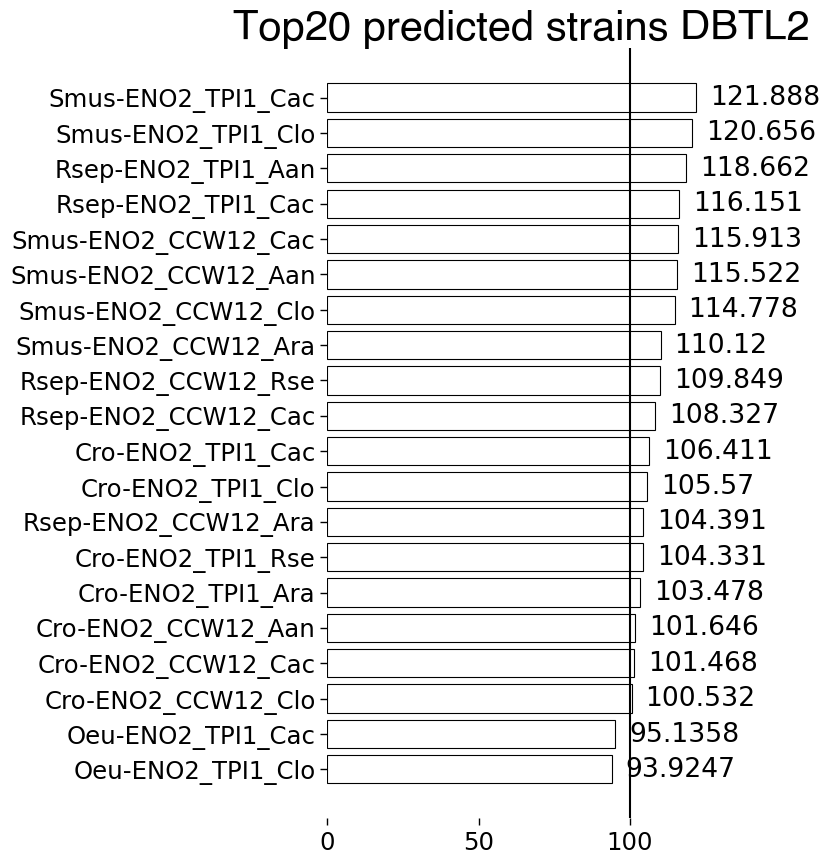

In [62]:
horisontal_bar_plot(x_axis,y_axis,  path = 'G8H_CPR_library/data/10-plots/11_2_LEARN_Data_analysis/Top20_predicted_strains_ML2', 
                    title = 'Top20 predicted strains DBTL2', 
                   size_height=5, 
                   size_length=10)

### 5.1 How many genotypes are predicted to produce more than the control strain?

In [63]:
over_100_strict_procduction = df_with_genotypes[df_with_genotypes['Predicted_strict_production'] >= 100 ]
print(f"{len(over_100_strict_procduction)} strains out of {len(df_with_genotypes)} showed production of strictosidine over the normalized value")
print(f"Out of the remaing theoretical space these constittue : {(len(over_100_strict_procduction)/len(df_with_genotypes))*100}%")

18 strains out of 1046 showed production of strictosidine over the normalized value
Out of the remaing theoretical space these constittue : 1.7208413001912046%


### 5.2 How well does the model predict on the old library i.e. 1121? Do we get the same genotypes when sorting for the best as the the first model? 

In [64]:
all_genotypes_1121 = pd.read_csv('G8H_CPR_library/data/09-AutoML/genotypes_for_ml/remaining_genotypes_after_first_iteration.csv', index_col= False)
all_genotypes =all_genotypes_1121[['0','1','2','3']]
all_genotypes_df = h2o.H2OFrame(pd.concat([all_genotypes], axis='columns'))

# Predict
predicted = best_model.predict(all_genotypes_df)

# make to dataframe
predicted_norm = predicted.as_data_frame()

# making predictions into a list
predicted_list = predicted_norm['predict'].values.tolist()

# Adding predictions to our dataframe
all_genotypes_1121['predicted_norm_strict'] = predicted_list

# Sorting the dataframe
predicted_merged_sorted = all_genotypes_1121.sort_values('predicted_norm_strict', ascending=False)
predicted_merged_sorted.to_csv('G8H_CPR_library/data/09-AutoML/all_predictions/second_round_model_on_old_library/top_predictions_by_second_round_model_on_data_from_the_first_round.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [65]:
g8h_list_of_index = ["CacuG8H", "OpumG8H","CroG8H","VminG8H","SmusG8H","RsepG8H","OeuG8H","CcalG8H"]
cpr_list_of_index = ["CroCPR", "AanCPR","AraCPR","CloCPR","RseCPR","AhuCPR","AniCPR","CacCPR","OeuCPR","CpoCPR"]
promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

g8h_genotype = []
cpr_genotype = []

pg8h_genotype = []
pcpr_genotype = []

predicted_list = []
# adding index of genotypes to individual rows 
for index, row in predicted_merged_sorted.iterrows():
    g8h_genotype.append(g8h_list_of_index[int(row['0'])-1])
    cpr_genotype.append(cpr_list_of_index[int(row['3'])-1])
    pg8h_genotype.append(promoters[int(row['1'])-1])
    pcpr_genotype.append(promoters[int(row['2'])-1])
    predicted_list.append(row['predicted_norm_strict'])
    
    
list_of_lists = [g8h_genotype,pg8h_genotype,pcpr_genotype, cpr_genotype, predicted_list  ]

In [66]:
ML2_recomendations = pd.DataFrame(list_of_lists )
ML2_recomendations = ML2_recomendations.T

ML2_recomendations.columns = ['G8H', 'pG8H', 'pCPR', 'CPR', 'Predicted_strict_production']
ML2_recomendations100 = ML2_recomendations[:100]

In [67]:
# what it recomended in first round 
ML1_recomendations = pd.read_csv('G8H_CPR_library/data/09-AutoML/all_predictions/first_round/top_ML_predicted_after_first_DBTL_merged_analytics.csv')
ML1_recomendations100 = ML1_recomendations[0:100]
ML1_recomendations100['G8H'] = ML1_recomendations100['G8H']+'G8H'
ML1_recomendations100['CPR'] = ML1_recomendations100['CPR']+'CPR'

ML1_recomendations100

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_2976/1923506259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ML1_recomendations100['G8H'] = ML1_recomendations100['G8H']+'G8H'
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_2976/1923506259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ML1_recomendations100['CPR'] = ML1_recomendations100['CPR']+'CPR'


,G8H,pG8H,pCPR,CPR,Predicted_strict_production
0,SmusG8H,ENO2,TPI1,CroCPR,189.410583
1,SmusG8H,ENO2,TPI1,CacCPR,184.930663
2,SmusG8H,ENO2,TPI1,AanCPR,183.786563
3,RsepG8H,ENO2,TPI1,AraCPR,179.451003
4,SmusG8H,ENO2,CCW12,AraCPR,177.130989
...,...,...,...,...,...
95,RsepG8H,ENO2,MLS1,AraCPR,52.550943
96,CroG8H,ENO2,CCW12,CloCPR,49.530658
97,SmusG8H,ENO2,MLS1,AanCPR,49.530375
98,OeuG8H,CYC1,TPI1,CacCPR,48.881757


In [68]:
ML1_recomendations100 = ML1_recomendations100[['G8H', 'pG8H', 'pCPR', 'CPR']]
ML2_recomendations100 = ML2_recomendations100[['G8H', 'pG8H', 'pCPR', 'CPR']]
ML2_recomendations100

,G8H,pG8H,pCPR,CPR
0,SmusG8H,ENO2,TPI1,AanCPR
1,SmusG8H,ENO2,TPI1,CacCPR
2,SmusG8H,ENO2,TPI1,CloCPR
3,RsepG8H,ENO2,TPI1,AanCPR
4,RsepG8H,ENO2,TPI1,CloCPR
...,...,...,...,...
95,OeuG8H,ENO2,URE2,CloCPR
96,RsepG8H,CYC1,CCW12,OeuCPR
97,RsepG8H,CYC1,TPI1,CroCPR
98,RsepG8H,CYC1,TPI1,OeuCPR


In [69]:
comparison = ML1_recomendations100.compare(ML2_recomendations100, keep_shape=True, keep_equal=True)
comparison

G8H           pG8H         pCPR            CPR        
       self    other  self other   self  other    self   other
0   SmusG8H  SmusG8H  ENO2  ENO2   TPI1   TPI1  CroCPR  AanCPR
1   SmusG8H  SmusG8H  ENO2  ENO2   TPI1   TPI1  CacCPR  CacCPR
2   SmusG8H  SmusG8H  ENO2  ENO2   TPI1   TPI1  AanCPR  CloCPR
3   RsepG8H  RsepG8H  ENO2  ENO2   TPI1   TPI1  AraCPR  AanCPR
4   SmusG8H  RsepG8H  ENO2  ENO2  CCW12   TPI1  AraCPR  CloCPR
..      ...      ...   ...   ...    ...    ...     ...     ...
95  RsepG8H   OeuG8H  ENO2  ENO2   MLS1   URE2  AraCPR  CloCPR
96   CroG8H  RsepG8H  ENO2  CYC1  CCW12  CCW12  CloCPR  OeuCPR
97  SmusG8H  RsepG8H  ENO2  CYC1   MLS1   TPI1  AanCPR  CroCPR
98   OeuG8H  RsepG8H  CYC1  CYC1   TPI1   TPI1  CacCPR  OeuCPR
99  SmusG8H   OeuG8H  ENO2  ENO2   TPI1   URE2  AhuCPR  RseCPR

[100 rows x 8 columns]

In [70]:
comparison.to_csv('G8H_CPR_library/data/09-AutoML/all_predictions/second_round_model_on_old_library/ML1_top_predicted_vs_ML2_top100_predicted.csv')

In [71]:
difference = pd.concat([ML1_recomendations100,ML2_recomendations100]).drop_duplicates(keep=False)
the_same_rows = len(ML1_recomendations100) -len(difference)

In [72]:
print(f'The top predictions from the ML model in the second dbtl are share by the first round by {the_same_rows/len(ML1_recomendations100)*100}%')

The top predictions from the ML model in the second dbtl are share by the first round by 60.0%


### 5.3 Plotting the top predictions 

In [73]:
from teemi.learn.plotting import color_range_dict
# importing a range of colors
cpr_color = color_range_dict()['yellow'][::2][::-1]
print(len(cpr_color))
pcpr_color = color_range_dict()['orange'][::6][::-1]
print(len(pcpr_color))
g8H_color= color_range_dict()['blue'][::3][::-1]
print(len(g8H_color))
pg8h_color = color_range_dict()['green'][::5][::-1]
print(len(pg8h_color))

10
4
8
4


In [74]:
g8h_list_of_index = ["CacuG8H", "OpumG8H","CroG8H","VminG8H","SmusG8H","RsepG8H","OeuG8H","CcalG8H"]
cpr_list_of_index = ["CroCPR", "AanCPR","AraCPR","CloCPR","RseCPR","AhuCPR","AniCPR","CacCPR","OeuCPR","CpoCPR"]
pg8h_list_of_index = ["CYC1", "ENO2","PCK1","RPL15B"]
pcpr_list_of_index = ["CCW12", "TPI1","MLS1","URE2"]
all_parts = g8h_list_of_index + pg8h_list_of_index+pcpr_list_of_index+cpr_list_of_index

G8H_color_codes = dict(zip(g8h_list_of_index, g8H_color))
pG8H_color_codes = dict(zip(pg8h_list_of_index, pg8h_color))
pCPR_color_codes = dict(zip(pcpr_list_of_index, pcpr_color))
CPR_color_codes = dict(zip(cpr_list_of_index, cpr_color))

colorDict = dict(G8H_color_codes, **pG8H_color_codes,**pCPR_color_codes, **CPR_color_codes)

In [75]:
from teemi.learn.plotting import carpet_barplot

26


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


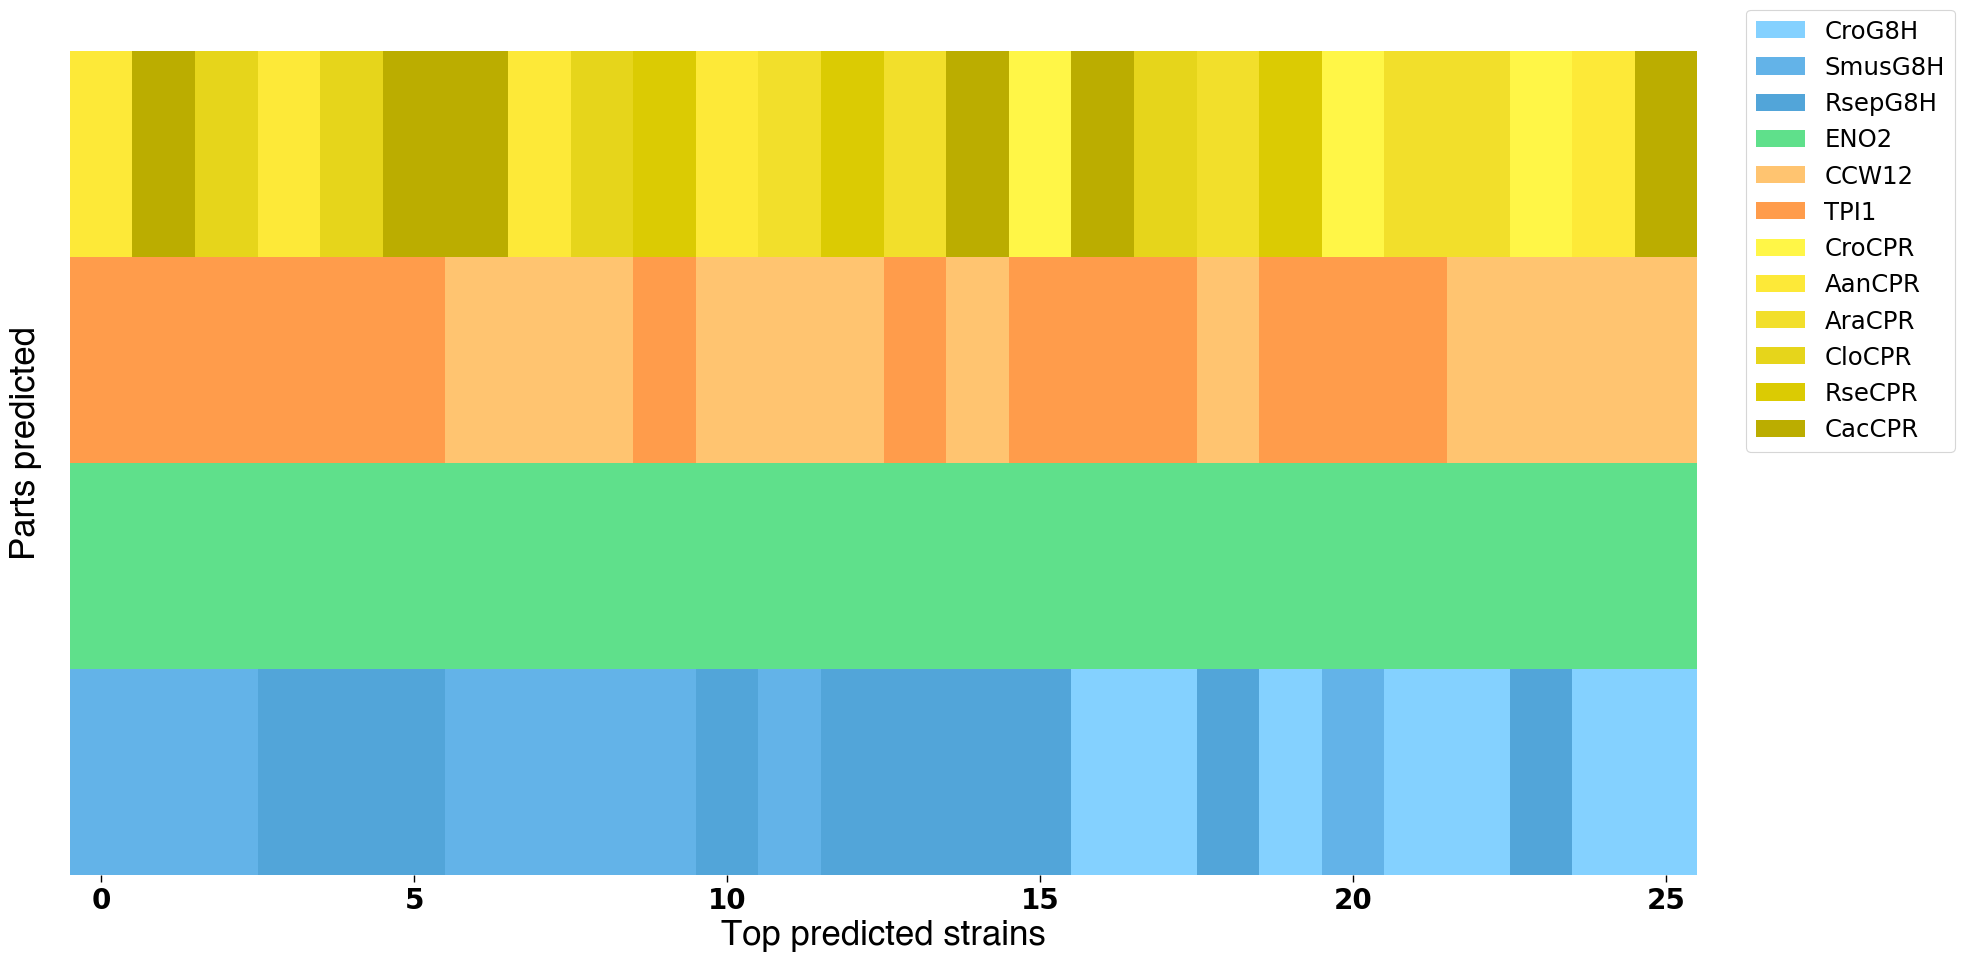

In [76]:
ML2_recomendations100['Index'] = ML2_recomendations100.index
list_of_parts = []
parst_index = []

for index, row in ML2_recomendations100.iterrows():
    list_of_parts.append(row['G8H'])
    list_of_parts.append(row['pG8H'])
    list_of_parts.append(row['pCPR'])
    list_of_parts.append(row['CPR'])
    parst_index.append(index)
    parst_index.append(index)
    parst_index.append(index)
    parst_index.append(index)


distribution = [25]*len(parst_index)

d = {'Index':parst_index,'Part':list_of_parts, 'Distribution':distribution }
df2 = pd.DataFrame(d)

# slice df
df200 = df2[:104]
cross_tab_prop = pd.crosstab(index=df200['Index'],
                             columns=df200['Part'])

coloumns = list(cross_tab_prop.columns)


print(len(cross_tab_prop))
# fix coloumns
coloumns = list(cross_tab_prop.columns)
fixed_columns = []
for name in all_parts:     
    if name in coloumns: 
        fixed_columns.append(name)

# get only the columns we use
cross_tab_prop = cross_tab_prop[fixed_columns]

name = 'Best_combinations_predicted_by_the_ML2_26_'
carpet_barplot(cross_tab_prop, colorDict, save_pdf= True , path ='G8H_CPR_library/data/10-plots/11_2_LEARN_Data_analysis/'+name, xlabel ='Top predicted strains' ,
               ylabel = 'Parts predicted', 
              size_height= 10, 
              size_length=20) 



## 6. Learning curve on data

In [77]:
from teemi.learn.auto_ml import autoML_on_partitioned_data

In [78]:
new_input_for_ml

,Line_name,0,1,2,3,Amt_uM_Strictosidine,Amt_norm
0,yp49_A01,1,2,5,1,0.271199,0.922793
1,yp49_C01,1,2,5,9,0.149626,0.509123
2,yp49_D01,2,4,7,3,0.049042,0.166871
3,yp49_E01,2,1,5,7,0.096246,0.327489
4,yp49_F01,3,3,6,1,7.365141,25.060934
...,...,...,...,...,...,...,...
124,yp54_A04,4,1,6,1,4.326963,15.322951
125,yp54_C04,5,2,6,3,26.634041,94.318358
126,yp54_C09,3,1,6,3,13.122270,46.469517
127,yp54_D12,5,1,6,6,1.049920,3.718051


To make sure we dont see the experimental differences between the different runs we can shuffle the data (see below)

In [79]:
shuffled_new_input_for_ml = new_input_for_ml.sample(frac=1, random_state= 1).reset_index(drop=True) # Random state sets a seed on the shuffeling
shuffled_new_input_for_ml

,Line_name,0,1,2,3,Amt_uM_Strictosidine,Amt_norm
0,yp54_A02,4,1,5,1,6.808027,24.109070
1,yp53_E11,7,1,5,5,0.477411,1.698060
2,yp54_F03,7,2,5,7,0.723004,2.560352
3,yp53_F09,6,1,5,7,0.516183,1.835963
4,yp54_A05,5,2,6,1,31.958430,113.173462
...,...,...,...,...,...,...,...
291,yp53_D06,4,2,6,5,30.736762,109.324769
292,yp54_B11,4,1,6,3,1.799734,6.373347
293,yp50_C03,4,2,6,9,19.840166,57.053306
294,yp53_E01,6,1,5,5,11.753071,41.803421


This function takes 20+ hours to run. 

In [80]:
#feature_cols = ['0', '1', '2', '3']
#training_column = 'Amt_norm'
#
## Training 5 partitions 3 times - the function is set to nfold = 10  by default. 
#for i in range(0,3): 
#    autoML_on_partitioned_data(feature_cols, training_column,
#                               shuffled_new_input_for_ml,
#                               training_time=0, 
#                               partitions = 5,
#                               nfold= 10,
#                               path = '/Users/lucaslevassor/projects/ConStrain/colab_notebooks/G8H_CPR_library/data/09-AutoML/learning_curve_data/second_round/nfold_10/0sec_experiment/shuffled_random1/')

In the following the LCMS data were concatenated in reverse order but run excactly the same as before.  Also takes 20+ hours

In [81]:
#new_input_for_ml = pd.concat([ second_input_for_ml,first_input_for_ml])
#shuffled_new_input_for_ml = new_input_for_ml.sample(frac=1, random_state= 1).reset_index(drop=True) # Random state sets a seed on the shuffeling
#feature_cols = ['0', '1', '2', '3']
#training_column = 'Amt_norm'
#
## Training 5 partitions 3 times - the function is set to nfold = 10  by default. 
#for i in range(0,3): 
#    autoML_on_partitioned_data(feature_cols, training_column,
#                               shuffled_new_input_for_ml,
#                               training_time=0, 
#                               partitions = 5,
#                               nfold= 10,
#                               path = '/Users/lucaslevassor/projects/ConStrain/colab_notebooks/G8H_CPR_library/data/09-AutoML/learning_curve_data/second_round/nfold_10/0sec_experiment/shuffled_random1/')

### 6.1 - Visiualizing the learning curve

In [100]:
import os

# folder path
dir_path = 'G8H_CPR_library/data/09-AutoML/learning_curve_data/second_round/nfold_10/0sec_experiment/shuffled_random1/'

# list file and directories
res = os.listdir(dir_path)
res

['.DS_Store',
 '2023_01_11_10:06_ml_models_running_over_partioned_data_df1_df2.csv',
 '2023_01_08_10:55_ml_models_running_over_partioned_data_df2_df1.csv',
 '2023_01_08_19:43_ml_models_running_over_partioned_data_df2_df1.csv',
 '2023_01_11_15:04_ml_models_running_over_partioned_data_df1_df2.csv',
 '2023_01_11_05:14_ml_models_running_over_partioned_data_df1_df2.csv',
 '2023_01_09_00:37_ml_models_running_over_partioned_data_df2_df1.csv']

In [101]:
lst_of_pd_dataframes = []
for ml_partitioned in res:
    if ml_partitioned.endswith('.csv'):
        lst_of_pd_dataframes.append(pd.read_csv(dir_path+ml_partitioned))

Lets retrieve the data 

In [102]:
dfs = [df.set_index('Unnamed: 0') for df in lst_of_pd_dataframes]
concated = pd.concat(dfs, axis=1)
concated

,0,CV_mean_MAE,CV_SD_MAE,Model_name,0,CV_mean_MAE,CV_SD_MAE,Model_name,0,CV_mean_MAE,...,CV_SD_MAE,Model_name,0,CV_mean_MAE,CV_SD_MAE,Model_name,0,CV_mean_MAE,CV_SD_MAE,Model_name
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
60,20.265256,24.947948,11.087297,XGBoost_lr_search_selection_AutoML_21_20230111...,11.039409,17.445988,4.449489,XGBoost_lr_search_selection_AutoML_16_20230108...,5.282633,16.528600,...,11.087297,XGBoost_lr_search_selection_AutoML_26_20230111...,16.737130,20.445763,11.993407,StackedEnsemble_BestOfFamily_6_AutoML_16_20230...,7.428000,14.660718,7.493557,StackedEnsemble_BestOfFamily_7_AutoML_26_20230...
120,12.173079,17.226658,9.652630,XGBoost_lr_search_selection_AutoML_22_20230111...,6.358275,12.685257,8.597869,XGBoost_lr_search_selection_AutoML_17_20230108...,6.680342,12.707113,...,6.700190,StackedEnsemble_AllModels_5_AutoML_28_20230111...,12.173079,17.226658,9.652630,XGBoost_lr_search_selection_AutoML_17_20230111...,6.358275,12.685257,8.597869,XGBoost_lr_search_selection_AutoML_27_20230108...
180,12.036415,14.984035,5.188294,StackedEnsemble_BestOfFamily_6_AutoML_23_20230...,9.341152,13.601612,3.948331,StackedEnsemble_AllModels_5_AutoML_18_20230108...,7.285898,14.398935,...,4.917861,StackedEnsemble_BestOfFamily_7_AutoML_30_20230...,11.479273,14.279459,5.249099,StackedEnsemble_BestOfFamily_6_AutoML_18_20230...,9.702213,12.834663,4.162396,StackedEnsemble_AllModels_5_AutoML_28_20230108...
240,10.178009,15.006841,6.094630,GBM_grid_1_AutoML_24_20230111_80742_model_12,8.611914,12.872042,3.526086,XGBoost_lr_search_selection_AutoML_19_20230108...,8.611914,12.872042,...,6.094630,GBM_grid_1_AutoML_32_20230111_130319_model_12,10.178009,15.006841,6.094630,GBM_grid_1_AutoML_19_20230111_31558_model_12,8.611914,12.872042,3.526086,XGBoost_lr_search_selection_AutoML_29_20230108...
296,10.119082,14.098402,4.570198,GBM_lr_annealing_selection_AutoML_25_20230111_...,9.448801,12.660960,3.520006,XGBoost_lr_search_selection_AutoML_20_20230108...,7.012233,14.471451,...,4.571663,GBM_grid_1_AutoML_34_20230111_140339_model_12,10.119082,14.098402,4.570198,GBM_lr_annealing_selection_AutoML_20_20230111_...,9.448801,12.660960,3.520006,XGBoost_lr_search_selection_AutoML_30_20230108...


In [103]:
# test results
test_results = concated[['0']]
test_results['mean'] = test_results.mean(axis=1)
test_results['std'] = test_results.std(axis=1)
test_results

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_2976/934127194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results['mean'] = test_results.mean(axis=1)
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_2976/934127194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results['std'] = test_results.std(axis=1)


,0,0,0,0,0,0,mean,std
Unnamed: 0,,,,,,,,
60,20.265256,11.039409,5.282633,20.265256,16.737130,7.428000,13.502948,5.950702
120,12.173079,6.358275,6.680342,12.279735,12.173079,6.358275,9.337131,2.873726
180,12.036415,9.341152,7.285898,10.961404,11.479273,9.702213,10.134392,1.583260
240,10.178009,8.611914,8.611914,10.178009,10.178009,8.611914,9.394961,0.783047
296,10.119082,9.448801,7.012233,10.048070,10.119082,9.448801,9.366011,1.091895


In [104]:
# Cross-validated mean MAE
cross_validated_results = concated[['CV_mean_MAE']]
cross_validated_results['mean'] = cross_validated_results.mean(axis=1)
cross_validated_results

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_2976/994047639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_validated_results['mean'] = cross_validated_results.mean(axis=1)


,CV_mean_MAE,CV_mean_MAE,CV_mean_MAE,CV_mean_MAE,CV_mean_MAE,CV_mean_MAE,mean
Unnamed: 0,,,,,,,
60,24.947948,17.445988,16.528600,24.947948,20.445763,14.660718,19.829494
120,17.226658,12.685257,12.707113,18.538673,17.226658,12.685257,15.178269
180,14.984035,13.601612,14.398935,16.290192,14.279459,12.834663,14.398149
240,15.006841,12.872042,12.872042,15.006841,15.006841,12.872042,13.939442
296,14.098402,12.660960,14.471451,14.349804,14.098402,12.660960,13.723330


In [105]:
# Cross-validated mean SD
cross_validated_results_sd = concated[['CV_SD_MAE']]
cross_validated_results_sd['mean'] = cross_validated_results_sd.mean(axis=1)
cross_validated_results_sd

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_2976/3504483626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_validated_results_sd['mean'] = cross_validated_results_sd.mean(axis=1)


,CV_SD_MAE,CV_SD_MAE,CV_SD_MAE,CV_SD_MAE,CV_SD_MAE,CV_SD_MAE,mean
Unnamed: 0,,,,,,,
60,11.087297,4.449489,7.178522,11.087297,11.993407,7.493557,8.881595
120,9.652630,8.597869,8.572280,6.700190,9.652630,8.597869,8.628911
180,5.188294,3.948331,4.240565,4.917861,5.249099,4.162396,4.617758
240,6.094630,3.526086,3.526086,6.094630,6.094630,3.526086,4.810358
296,4.570198,3.520006,5.001020,4.571663,4.570198,3.520006,4.292182


In [106]:
from teemi.learn.plotting import plot_ml_learning_curve

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


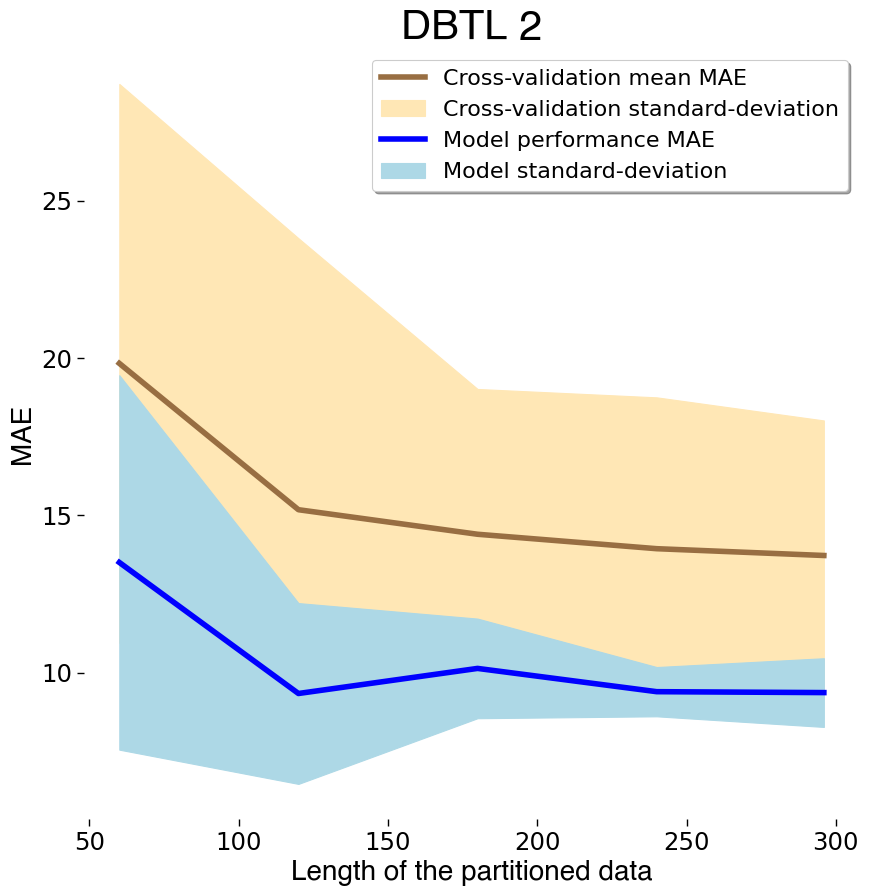

In [107]:
# CV
x = list(cross_validated_results.index)
y = list(cross_validated_results['mean'])
sd =  np.array(list(cross_validated_results_sd['mean']))

# model_performance
y1 = list(test_results['mean'])
sd1 = np.array(list(test_results['std']))

plot = plot_ml_learning_curve(x, y1, y,sd1,  sd, save_pdf = True , 
                              path = 'G8H_CPR_library/data/10-plots/11_2_LEARN_Data_analysis/Learning_curve_on_partitioned_data_DBTL2_10_height_10_length.pdf', 
                             size_height = 10,
                             size_length = 10, 
                             linewidth=4, 
                             title = 'DBTL 2'
)

In [108]:
h2o.shutdown()

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_2976/2900054706.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()
